# model of ring and injector vacuum system
Units are cm and liter

In [1]:
from vacuum_modeling.vacuum_analyzer import VacuumSystem,solve_vac_system,show_vac_sys,vacuum_lifetime,Tube
from vacuum_modeling.vacuum_constants import big_ion_pump_speed,small_ion_pump_speed,outgassing_rates
from constants import gas_masses
import matplotlib.pyplot as plt

# dump chamber model

model of chamber that helium load falls into

In [2]:
def helium_dump_back_gas_load():
    Q = 4e-5  # assuming 1 cm hole located 2 meter from nozzle,60 sccm, and dump chamber is 3 meter from nozzle
    dummy_speed=1e9 #assume that none of the helium that wanders back through the tube returns
    vac_sys = VacuumSystem(gas_mass_Daltons=gas_masses['He'])
    vac_sys.add_chamber(Q=Q, S=1000)
    vac_sys.add_tube(50, 1.8)
    vac_sys.add_chamber(S=dummy_speed)
    solve_vac_system(vac_sys)
    Q_back = vac_sys.components[-1].P * vac_sys.components[-1].S()
    return Q_back
helium_dump_back_gas_load()

1.515996958977292e-07

# injector model

bumping and mode matching lens. three stages of differential pumping to fight the helium

/Users/williamdebenham/Desktop/storageRing/storageRing/storageRingModel/vacuumModeling/vacuumanalyzer.py:79: UserWarning: Tube length should be several times longer than diam for more accurate results
  warnings.warn('Tube length should be several times longer than diam for more accurate results')
/Users/williamdebenham/Desktop/storageRing/storageRing/storageRingModel/vacuumModeling/vacuumanalyzer.py:79: UserWarning: Tube length should be several times longer than diam for more accurate results
  warnings.warn('Tube length should be several times longer than diam for more accurate results')


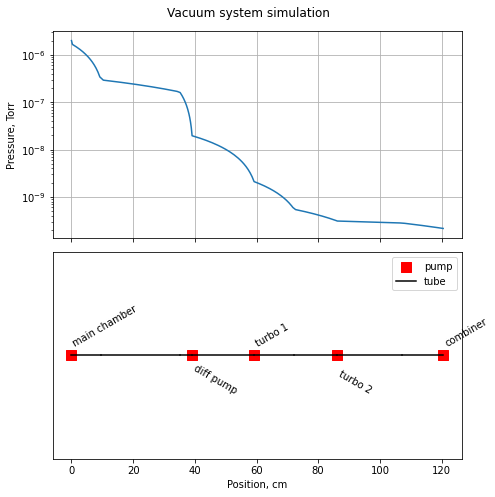

4.319546452344552e-09 2.159773226172276e-10
--Component information-- 
component type: Chamber
name: main chamber
P: 2e-06
_S: 0.0
Q: 0.0
input_tube: None

--Component information-- 
component type: Chamber
name: diff pump
P: 1.960485717219647e-08
_S: 940
Q: 1.515996958977292e-07
input_tube: --Component information-- 
component type: Tube
name: unassigned
P_x_vals: [0.16129032 0.32258065 0.48387097 0.64516129 0.80645161 0.96774194
 1.12903226 1.29032258 1.4516129  1.61290323 1.77419355 1.93548387
 2.09677419 2.25806452 2.41935484 2.58064516 2.74193548 2.90322581
 3.06451613 3.22580645 3.38709677 3.5483871  3.70967742 3.87096774
 4.03225806 4.19354839 4.35483871 4.51612903 4.67741935 4.83870968]
P: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
L: 5.0
inside_diam: 10.0
Q: 0.0


--Component information-- 
component type: Chamber
name: turbo 1
P: 2.1072601576821455e-09
_S: 200
Q: 0.0
input_tube: --Component inform

In [3]:
big_chamber_pressure=2e-6 #from helium flow

gas='He'

vac_sys_inj=VacuumSystem(gas_mass_Daltons=gas_masses[gas])
vac_sys_inj.add_chamber(P=big_chamber_pressure,name='main chamber')
vac_sys_inj.add_aperture(1.5)
vac_sys_inj.add_tube(9.5,1.5)
vac_sys_inj.add_tube(25.6,4.6)
# vac_sys_inj.add_tube(5.8,3.5)
vac_sys_inj.add_tube(4.0,2.4)
vac_sys_inj.add_chamber(S=940,input_tube=Tube(5.0,10.0),Q=helium_dump_back_gas_load(), name='diff pump')
# vac_sys_inj.add_aperture(2.4)
vac_sys_inj.add_tube(20.1,2.4)
vac_sys_inj.add_chamber(S=200,input_tube=Tube(5.0,5.0),name='turbo 1')
# vac_sys_inj.add_aperture(2.4)
vac_sys_inj.add_tube(13,2.4)

vac_sys_inj.add_tube(14.0,4.6)
vac_sys_inj.add_chamber(S=200,input_tube=Tube(5.0,5.0),name='turbo 2')
vac_sys_inj.add_tube(21,4.6)
vac_sys_inj.add_tube(13.3,3)



vac_sys_inj.add_chamber(S=big_ion_pump_speed[gas],name='combiner')
# vac_sys_inj.add_chamber(S=0)
%matplotlib inline
solve_vac_system(vac_sys_inj)
show_vac_sys(vac_sys_inj,save_fig='inj_vac',dpi=300,fig_size=(7,7))
Q_injector=vac_sys_inj.components[-1].P*vac_sys_inj.components[-1].S()
print(Q_injector,vac_sys_inj.components[-1].P)
vacuum_lifetime(vac_sys_inj.components[-1].P,gas)
for chamber in vac_sys_inj.chambers():
    print(chamber)

# ring model

In [4]:
def add_split_bend_vacuum(vac_sys, rp_ID, L_split_bend, S_small_pumps, q):
    vac_sys.add_tube(L_split_bend, rp_ID, q=q)
    vac_sys.add_chamber(S=S_small_pumps, name='bend',input_tube=Tube(2.6,1.2))
    vac_sys.add_tube(L_split_bend, rp_ID, q=q)

/Users/williamdebenham/Desktop/storageRing/storageRing/storageRingModel/vacuumModeling/vacuumanalyzer.py:79: UserWarning: Tube length should be several times longer than diam for more accurate results
  warnings.warn('Tube length should be several times longer than diam for more accurate results')


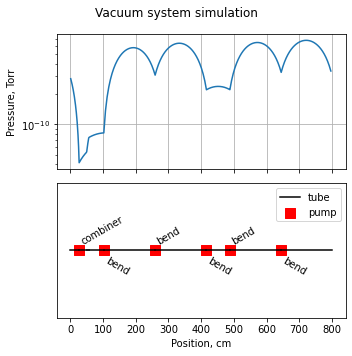

tau: 11.676988124226172
Pressure: 4.3434947442388017e-10


In [6]:
%matplotlib tk
L_split_bend=157
bend_ID=1.7

L_long_connecting_tube=71.7
long_tube_ID=3.6



gas='H2'
q=10*outgassing_rates[gas]
Q_combiner=Q_injector if gas =='He' else 0.0

vac_sys = VacuumSystem(is_circular=True, gas_mass_Daltons=gas_masses[gas])
vac_sys.add_tube(26.6,1.8,q=q)
vac_sys.add_chamber(S=big_ion_pump_speed[gas], name='combiner',input_tube=Tube(6.2,5.2),Q=Q_combiner)
vac_sys.add_tube(23,7,q=q)
vac_sys.add_tube(6.5,3.5,q=q)
vac_sys.add_tube(46,7.5,q=q)
vac_sys.add_chamber(S=small_ion_pump_speed[gas],input_tube=Tube(3.5,4.5),name='bend')

add_split_bend_vacuum(vac_sys, bend_ID, L_split_bend, small_ion_pump_speed[gas], q)

vac_sys.add_chamber(S=small_ion_pump_speed[gas],input_tube=Tube(2.3,3.0),name='bend')
vac_sys.add_tube(L_long_connecting_tube, long_tube_ID,q=q)
vac_sys.add_chamber(S=small_ion_pump_speed[gas],input_tube=Tube(2.3,3.0),name='bend')
add_split_bend_vacuum(vac_sys, bend_ID, L_split_bend, small_ion_pump_speed[gas], q)
solve_vac_system(vac_sys)
%matplotlib inline
show_vac_sys(vac_sys,save_fig='ring_vac',dpi=300,fig_size=(5,5))

print('tau:',vacuum_lifetime(vac_sys.P_mean,gas))
print('Pressure:',vac_sys.P_mean)
# for chamber in vac_sys.chambers():
#     print(chamber)

In [10]:
Tube(2.6,1.2).C(2.0)

30.656693879733545